In [1]:
# Import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sma
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import arange
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
est = pd.read_csv('/content/construction_estimates.csv')

# Observe the first five rows
est.head()

,Material_Cost,Labor_Cost,Profit_Rate,Discount_or_Markup,Policy_Reason,Total_Estimate
0,43985,12836,10,1095,Market conditions require competitive pricing ...,63598.10
1,45504,17873,15,-6426,Market conditions require competitive pricing ...,66457.55
2,33656,8401,25,9862,"The client is a repeat customer, deserving a l...",62433.25
3,36509,8523,20,8096,"The client is a repeat customer, deserving a l...",62134.40
4,37372,14123,30,-9598,Strategic importance of this client justifies ...,57345.50


In [3]:
# Drop the policy reason column
est.drop(columns=['Policy_Reason'], inplace=True)

In [4]:
# Observe the first five rows again
est.head()

,Material_Cost,Labor_Cost,Profit_Rate,Discount_or_Markup,Total_Estimate
0,43985,12836,10,1095,63598.10
1,45504,17873,15,-6426,66457.55
2,33656,8401,25,9862,62433.25
3,36509,8523,20,8096,62134.40
4,37372,14123,30,-9598,57345.50


In [5]:
# Check the data type
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material_Cost       1000 non-null   int64  
 1   Labor_Cost          1000 non-null   int64  
 2   Profit_Rate         1000 non-null   int64  
 3   Discount_or_Markup  1000 non-null   int64  
 4   Total_Estimate      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [6]:
# Gather basic statistics
est.describe()

,Material_Cost,Labor_Cost,Profit_Rate,Discount_or_Markup,Total_Estimate
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29908.74700,17566.307000,19.740000,-73.475000,56769.692700
std,11200.10159,7225.096808,6.955629,5750.120642,17465.481663
min,10038.00000,5067.000000,10.000000,-9987.000000,13319.150000
25%,20528.00000,11462.500000,15.000000,-5102.250000,44069.300000
50%,30023.50000,17591.500000,20.000000,-131.000000,57121.350000
75%,39438.75000,23738.750000,25.000000,4980.000000,69295.100000
max,49947.00000,29923.000000,30.000000,9979.000000,109165.400000


In [7]:
# Check the null values
est.isnull().sum()

,0
Material_Cost,0
Labor_Cost,0
Profit_Rate,0
Discount_or_Markup,0
Total_Estimate,0


In [8]:
# Create the correlation map
ecor = est.corr()
ecor.style.background_gradient(cmap='RdYlGn')

,Material_Cost,Labor_Cost,Profit_Rate,Discount_or_Markup,Total_Estimate
Material_Cost,1.000000,0.034585,-0.007108,0.052946,0.798886
Labor_Cost,0.034585,1.000000,0.004123,-0.074474,0.497173
Profit_Rate,-0.007108,0.004123,1.000000,-0.039975,0.172433
Discount_or_Markup,0.052946,-0.074474,-0.039975,1.000000,0.325117
Total_Estimate,0.798886,0.497173,0.172433,0.325117,1.000000


# Linear Regression

In [9]:
# Create the feature and target variables
X = est.drop(columns=['Total_Estimate'])
y = est['Total_Estimate']

In [10]:
# Split the training and test datasets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Create the linear regression regressor
lm = LinearRegression()
lm = lm.fit(x_train,y_train)

In [12]:
# Use the trained linear regression model (lm) to make predictions
y_pred = lm.predict(x_test)

In [13]:
# Print the R2, Mean Absolute Error, Mean Standard Error, Root Squared Standard Error scores
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.9969827046541916
MAE: 624.7866926551771
MSE: 871116.3063661304
RMSE: 933.3361165015154


# Ordinary Least Squares Regression

In [14]:
# Add a constant term (intercept) to the training and testing data.
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)

In [15]:
# Create and fit an Ordinary Least Squares (OLS) regression model.
con = sma.OLS(y_train,x_train).fit()

In [16]:
# Print the results
print(con.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_Estimate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.765e+04
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:40:35   Log-Likelihood:                -6621.2
No. Observations:                 800   AIC:                         1.325e+04
Df Residuals:                     795   BIC:                         1.328e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9087.7399    156

# Quantile Regression

In [17]:
# Fit the model
codel = smf.quantreg('Material_Cost ~ Total_Estimate', est).fit(q=0.9)

# View model summary
print(codel.summary())

                         QuantReg Regression Results                          
Dep. Variable:          Material_Cost   Pseudo R-squared:               0.3421
Model:                       QuantReg   Bandwidth:                       2896.
Method:                 Least Squares   Sparsity:                    3.612e+04
Date:                Fri, 18 Apr 2025   No. Observations:                 1000
Time:                        05:40:35   Df Residuals:                      998
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.047e+04    905.099     11.572      0.000    8697.288    1.22e+04
Total_Estimate     0.4984      0.015     33.847      0.000       0.470       0.527

The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other nume

# KNN Regression

In [18]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=120)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=120)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R2 scores
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 871116.3063661304
R-squared: 0.9969827046541916


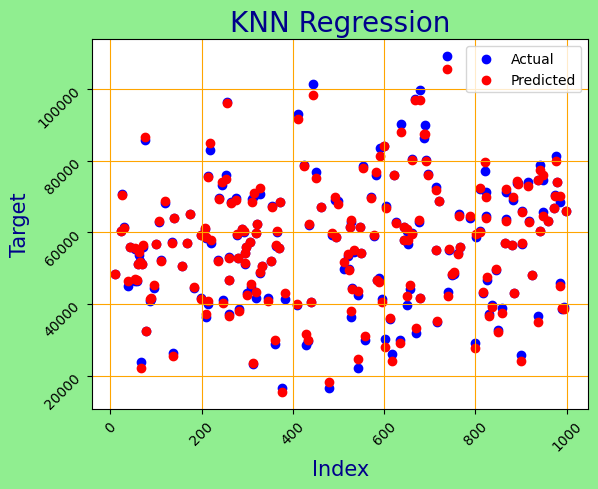

In [20]:
# Visualize the results
fig = plt.figure(facecolor='lightgreen')  # Add background color here
plt.scatter(x_test.index, y_test, color='blue', label='Actual') # Use x_test.index to get the index values
plt.scatter(x_test.index, y_pred, color='red', label='Predicted') # Use x_test.index for predicted values as well
plt.title('KNN Regression', fontsize = 20, color = 'darkblue')
plt.xlabel('Index',fontsize = 15, color = 'darkblue')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True, color = 'orange')
plt.ylabel('Target', fontsize = 15, color = 'darkblue')
plt.legend()
plt.show()

# Principal Components Regression

In [21]:
# Scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [22]:
# Define cross validation method
cv = RepeatedKFold(n_splits=15, n_repeats=5, random_state=42)

regr = LinearRegression()
mse = []

In [23]:
# Calculate MSE with only the intercept
score = -cross_val_score(regr, np.ones((len(X_reduced), 1)), y, cv=cv, scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -cross_val_score(regr, X_reduced[:, :i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

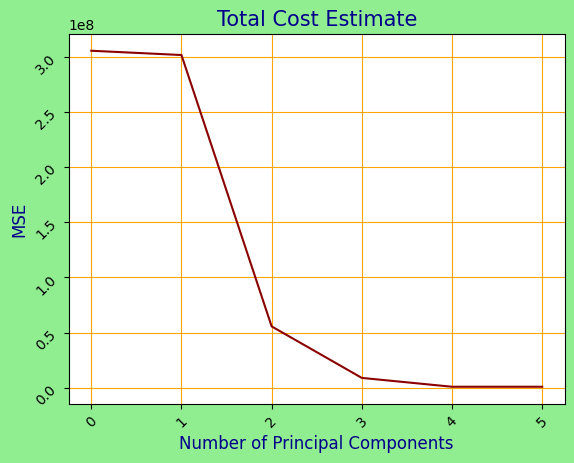

In [24]:
# Plot cross-validation results
fig = plt.figure(facecolor='lightgreen')  # Add background color here
plt.plot(mse, color = 'darkred')
plt.xlabel('Number of Principal Components', fontsize = 12, color = 'darkblue')
plt.ylabel('MSE', fontsize = 12, color = 'darkblue')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True, color = 'orange')
plt.title('Total Cost Estimate', fontsize = 15, color = 'darkblue')
plt.show()

In [25]:
# Calculate the cumulative sum of explained variance ratios.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 27.28,  53.13,  77.84, 100.01])

In [26]:
# Scale the training and testing data
X_reduced_train = pca.fit_transform(scale(x_train))
X_reduced_test = pca.transform(scale(x_test))[:,:1]

# Train PCR model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

# Calculate RMSE
pred = regr.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

16890.04526964125


Citations

 https://www.listendata.com/2018/01/linear-regression-in-python.html

 https://www.geeksforgeeks.org/k-nearest-neighbors-knn-regression-with-scikit-learn/

 https://www.statology.org/correlation-matrix-python/

 https://www.statology.org/quantile-regression-in-python/

 https://www.statology.org/principal-components-regression-in-python/